In [129]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, FixedLocator, MultipleLocator
import re

### Analysis of Complied Data
Here I use Pandas and PyPlot to analyze the data as a whole to answer questions and draw conclusions. 

In [130]:

# Set the path of the directory that contains the CSV files
directory = '/Users/laceymorgan/Desktop/data_job_analysis/'

# Get a list of all CSV files in the directory
csv_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.csv')]

# Create an empty DataFrame to store the concatenated data
df = pd.DataFrame()

# Loop through each CSV file and concatenate the data
for file in csv_files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], ignore_index=True)


In [131]:

df.head()

,job_title,company_name,job_description,via,job_id,posted_hours_ago,report_run_datetime,apply_options,rating,#_of_reviews,...,salary_based_on,salary_from,salary_to,salary_source,my_keywords,job_description_summary,preprocessed_description,sentiment_score,salary_mention,named_entity_recognition
0,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-08 13:07:51,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,NaN,NaN,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...
1,Data Analyst,Ookla,"We’re Ookla, the company behind Speedtest, Dow...",via Jobs By Workable,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0,2023-03-08 13:07:51,https://apply.workable.com/ookla/j/96DE997419/...,4.7,20.0,...,Based on local employers,54000.0,120000.0,Indeed,python visualization sql,"We’re Ookla, the company behind Speedtest, Dow...",ookla compani behind speedtest downdetector su...,0.9989,"['range', 'reflected', 'is', 'an', 'estimate',...",(S\n We/PRP\n ’/VBP\n re/JJ\n Ookla/NNP\n ...
2,Senior Data Analyst,Vouch,"About Vouch:\n\nInsurance... sounds slow, old-...",via Y Combinator,eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,0,2023-03-08 13:07:51,https://www.ycombinator.com/companies/vouch/jo...,4.6,28.0,...,NaN,NaN,NaN,NaN,python sql tableau,"As an insurance company, data is at the core o...",vouch insur sound slow unexcit exact insur bro...,0.9892,"['Range:', 'The', 'pay', 'range', 'for', 'this...",(S\n About/IN\n (PERSON Vouch/JJ)\n :/:\n ...
3,Program Operations Management Analyst,Google,Minimum qualifications:\n• Bachelor's degree o...,via Girlboss Jobs,eyJqb2JfdGl0bGUiOiJQcm9ncmFtIE9wZXJhdGlvbnMgTW...,0,2023-03-08 13:07:00,https://jobs.girlboss.com/program-operations-m...,4.4,40866.0,...,Based on local employers,49000.0,78000.0,Salary.com,visualization sql tableau,• Knowledge of SQL and data visualization tool...,minimum qualif bachelor degre equival practic ...,0.9908,"['range', 'between', '$109,000', '-', '$117,00...",(S\n (GPE Minimum/JJ)\n qualifications/NNS\n...
4,Business Operations Analyst,Juniper Networks,Job Title: Business Analyst - Global Service O...,via Salary.com,eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBPcGVyYXRpb25zIE...,0,2023-03-08 13:07:00,https://www.salary.com/job/juniper-networks/bu...,4.3,3960.0,...,Juniper Networks,76000.0,120000.0,Indeed,NaN,Responsibilities... The primary responsibility...,job titl busi analyst global servic oper respo...,0.9337,salary not mentioned,(S\n (PERSON Job/NNP)\n Title/NNP\n :/:\n ...


In [132]:
print(df.isnull().sum())

job_title                      0
company_name                   0
job_description                0
via                            0
job_id                         0
posted_hours_ago               0
report_run_datetime            0
apply_options                  0
rating                      1341
#_of_reviews                1341
rating_source               1341
salary_based_on             1658
salary_from                 1658
salary_to                   1658
salary_source               1658
my_keywords                 1002
job_description_summary        0
preprocessed_description       0
sentiment_score                0
salary_mention                 0
named_entity_recognition       0
dtype: int64


In [133]:
len(df)

2400

In [134]:
# Count the number of unique job IDs in the 'job_id' column
unique_job_ids = df['job_id'].nunique()

# Print the result
print(f'The number of unique job IDs is {unique_job_ids}.')

The number of unique job IDs is 240.


In [135]:
# Count the number of unique job IDs in the 'job_id' column
unique_job_ids_2 = len(set(df['job_id']))

# Print the result
print(f'The number of unique job IDs is {unique_job_ids_2}.')

The number of unique job IDs is 240.


In [136]:
# Remove duplicate rows based on 'job_id'
clean_df = df.drop_duplicates(subset=['job_id'])

In [137]:
len(clean_df)

240

In [138]:
clean_df['my_keywords'].value_counts()

sql                                 23
python sql                          19
python visualization sql tableau    17
sql tableau                         16
tableau                             12
python sql tableau                  10
visualization sql tableau            8
python                               8
visualization sql                    7
visualization                        6
visualization tableau                4
python visualization sql             3
python visualization tableau         3
python tableau                       1
python pandas                        1
Name: my_keywords, dtype: int64

In [139]:
# Count the number of rows with at least one keyword hit
num_keyword_hits = len(clean_df[clean_df['my_keywords'].notnull()])

# Calculate the percentage of rows with keyword hits
percent_keyword_hits = num_keyword_hits / len(clean_df) * 100

# Print the results
print(f'{num_keyword_hits} out of {len(clean_df)} rows ({percent_keyword_hits:.2f}%) had keyword hits.')


138 out of 240 rows (57.50%) had keyword hits.


In [140]:
# Analyzing how much NLTK summarizer reduced the descriptions
clean_df =  clean_df.copy()

clean_df['job_desc_len'] = clean_df['job_description'].str.len()
clean_df['job_sum_len'] = clean_df['job_description_summary'].str.len()

avg_job_desc_len = round(clean_df['job_desc_len'].mean())
avg_job_sum_len = round(clean_df['job_sum_len'].mean())
avg_desc_perc_change = round((avg_job_sum_len-avg_job_desc_len)/avg_job_desc_len *-100)

print(f'The average length of a job description was {avg_job_desc_len}, the NLTK summarizer brought the average length down to {avg_job_sum_len}.')
print(f'That is a reduction of {avg_desc_perc_change}% in length on average.')

The average length of a job description was 4188, the NLTK summarizer brought the average length down to 1066.
That is a reduction of 75% in length on average.


In [141]:
# Looking at the the most common job titles

top_overall_titles = clean_df.groupby(clean_df['job_title']).count()['job_description'].sort_values(ascending=False)[0:10]
# Calculate the percentage of total for each job title
total_count = len(clean_df['job_description'])
percent_of_total = top_overall_titles.apply(lambda x: (x / total_count) * 100)

# Adding the percent of total column to the groupby object
top_overall_titles_with_pct = pd.concat([top_overall_titles, percent_of_total], axis=1, keys=['count', 'percent_of_total'])

# Round the percent column to two decimal places
top_overall_titles_with_pct['percent_of_total'] = top_overall_titles_with_pct['percent_of_total'].round(2)

print(top_overall_titles_with_pct)

                                     count  percent_of_total
job_title                                                   
Data Analyst                            34             14.17
Operations Analyst                      25             10.42
Senior Data Analyst                     13              5.42
Sales Operations Analyst (Remote)        6              2.50
Business Operations Analyst              5              2.08
Revenue Operations Analyst (Remote)      5              2.08
Data Analyst (Remote)                    4              1.67
Sales Data Analyst                       4              1.67
Data Analyst Senior - BIS (Remote)       3              1.25
Revenue Operations Analyst               3              1.25


In [142]:
# Looking at the companies that have the most listings in the dataset

top_overall_comps = clean_df.groupby(clean_df['company_name']).count()['job_description'].sort_values(ascending=False)[0:10]
# Calculate the percentage of total for each job title
total_count = len(df['job_description'])
percent_of_total = top_overall_comps.apply(lambda x: (x / total_count) * 100)

# Adding the percent of total column to the groupby object
top_overall_comps_with_pct = pd.concat([top_overall_comps, percent_of_total], axis=1, keys=['count', 'percent_of_total'])

# Round the percent column to two decimal places
top_overall_comps_with_pct['percent_of_total'] = top_overall_comps_with_pct['percent_of_total'].round(2)

print(top_overall_comps_with_pct)

                    count  percent_of_total
company_name                               
City National Bank      6              0.25
Robert Half             5              0.21
Peraton                 4              0.17
Headway                 4              0.17
Randstad USA            3              0.12
UnitedHealth Group      3              0.12
COTA                    3              0.12
Beyond Finance          3              0.12
InnovateEDU             3              0.12
Pinterest               3              0.12


### Visualizations of Cumulative Data

The following three visualizations give an overview of the data collected over the course of the project. They show which companies are most frequently listing the jobs searched, the actual titles of the listings and where the jobs are being posted most frequently. 

Graphs are saved to an output file.

In [143]:
# Getting the top companies by # of listings 

top_overall_listers = clean_df.groupby(clean_df['company_name']).count()['job_title'].sort_values(ascending=False)[0:15]

top_overall_comps = top_overall_listers.index.tolist()
top_overall_comps_nums = top_overall_listers.values.tolist()

In [167]:
# Remove non-alphanumeric characters from top_comps
top_overall_comps = [re.sub(r'\W+', '', comp) for comp in top_overall_comps]


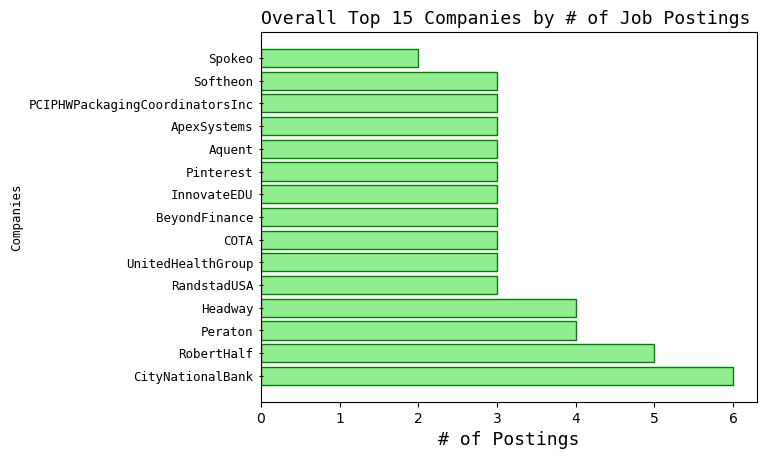

In [173]:

# Create horizontal bar chart for the overall top companies by # of listings 
plt.barh(top_overall_comps, top_overall_comps_nums, align='center', color='lightgreen', edgecolor='green')

# Set x-axis label, title, and ticks
plt.xlabel('# of Postings', fontdict={'family':'monospace','color':'black','size':13})
plt.title('Overall Top 15 Companies by # of Job Postings', fontdict={'family':'monospace','color':'black','size':13}, loc='left')
# plt.xticks(range(int(min(top_overall_comps)), int(max(top_overall_comps_nums))+1))

# Set y-axis label and font
plt.ylabel('Companies', fontdict={'family':'monospace','color':'black','size':9})
plt.tick_params(axis='y', labelsize=9)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties({'family':'monospace','size':9})

# Adjust y-axis ticks
plt.tick_params(axis='y', which='major', direction='inout')

# Adjust the figure size for best viewing
# plt.figure(figsize=(8,5))

# Save and display plot
# plt.tight_layout()
plt.savefig('/Users/laceymorgan/Desktop/data_job_analysis/visualizations/overall_top_companies.png',dpi=300, bbox_inches='tight')

plt.show()


In [146]:
# Getting the overall top job titles by frequency

top_overall_desc = clean_df.groupby(clean_df['job_title']).count()['job_description'].sort_values(ascending=False)[0:15]

top_overall_title = top_overall_desc.index.tolist()
top_overall_title_nums = top_overall_desc.values.tolist()

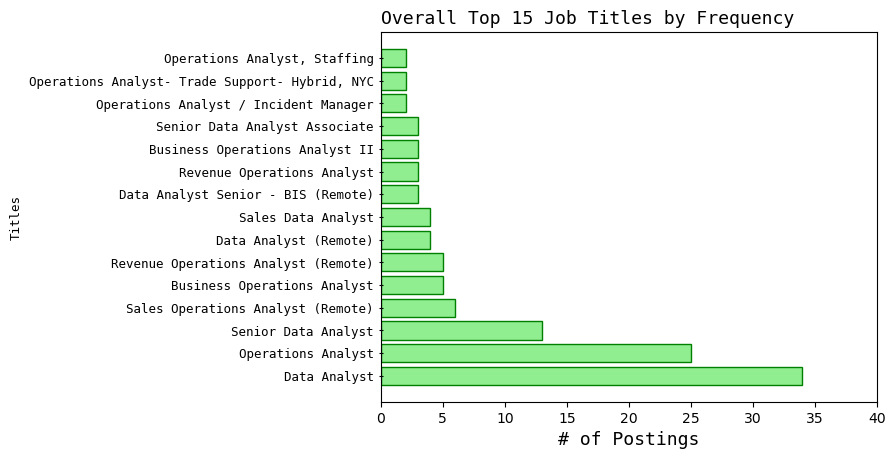

In [174]:

# Create horizontal bar chart for the overall top job titles by frequency
plt.barh(top_overall_title, top_overall_title_nums, align='center', color='lightgreen', edgecolor='green')

# Set x-axis label, title, and ticks
plt.xlabel('# of Postings', fontdict={'family':'monospace','color':'black','size':13})
plt.title('Overall Top 15 Job Titles by Frequency', fontdict={'family':'monospace','color':'black','size':13}, loc='left')
plt.xticks(range(int(min(top_overall_title_nums)), int(max(top_overall_title_nums))+1))
x_major_locator = MultipleLocator(5)
plt.gca().xaxis.set_major_locator(x_major_locator)

# Set y-axis label and font
plt.ylabel('Titles', fontdict={'family':'monospace','color':'black','size':9})
plt.tick_params(axis='y', labelsize=9)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties({'family':'monospace','size':9})
plt.xlim(0,40)
# Adjust y-axis ticks
plt.tick_params(axis='y', which='major', direction='inout')

# Adjust the figure size for best viewing
# plt.figure(figsize=(8, 5))
    
# Save and display plot
# plt.tight_layout()
plt.savefig('/Users/laceymorgan/Desktop/data_job_analysis/visualizations/overall_top_titles.png',dpi=300, bbox_inches='tight')
plt.show()




In [148]:
# Getting the top overall listings sites by frequency

top_overall_announce = clean_df.groupby(clean_df['via']).count()['job_description'].sort_values(ascending=False)[0:15]

top_overall_announce_name = top_overall_announce.index.tolist()
top_overall_announce_nums = top_overall_announce.values.tolist()

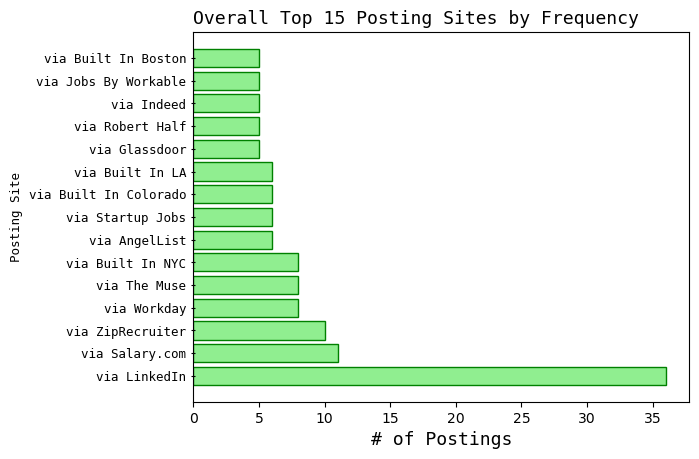

In [175]:

# Create horizontal bar chart for the overall top job titles by frequency
plt.barh(top_overall_announce_name, top_overall_announce_nums, align='center', color='lightgreen', edgecolor='green')

# Set x-axis label, title, and ticks
plt.xlabel('# of Postings', fontdict={'family':'monospace','color':'black','size':13})
plt.title('Overall Top 15 Posting Sites by Frequency', fontdict={'family':'monospace','color':'black','size':13},loc='left')
plt.xticks(range(int(min(top_overall_announce_nums)), int(max(top_overall_announce_nums))+1))
x_major_locator = MultipleLocator(5)
plt.gca().xaxis.set_major_locator(x_major_locator)

# Set y-axis label and font
plt.ylabel('Posting Site', fontdict={'family':'monospace','color':'black','size':9})
plt.tick_params(axis='y', labelsize=9)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties({'family':'monospace','size':9})

# Adjust y-axis ticks
plt.tick_params(axis='y', which='major', direction='inout')

# Adjust the figure size for best viewing
# plt.figure(figsize=(8, 5))

# Save and display plot
# plt.tight_layout()
plt.savefig('/Users/laceymorgan/Desktop/data_job_analysis/visualizations/overall_top_posting_site.png',dpi=300, bbox_inches='tight')
plt.show()


## LinkedIn Analysis

Looking at the total # of listings captured by the SERP API Google Job search, by far the most listings are found on LinkedIn so a deeper looking at those specific postings might yeild interesting insights

In [150]:
link_df = clean_df.loc[clean_df['via'] == 'via LinkedIn']

print(f'{len(link_df)} of the job postings captured were via LinkedIn. That is {round(len(link_df)/len(clean_df)*100,2)}% of the jobs captured')

36 of the job postings captured were via LinkedIn. That is 15.0% of the jobs captured


## Cumulative NLTK Analysis
Looking at the total results of the Natural Learning Toolkit methods applied to the dataset. 

In [151]:
# Define the pattern to match
pattern = r'\b(senior|sr|sr\.|lead|manager|sr .)\b'

# Create a new column that returns a boolean indicating whether the my_keywords column matches the pattern
clean_df['senior_match'] = clean_df['job_title'].str.lower().str.contains(pattern) 

# Examining how many listings are for these senior roles

# Count the number of True values in the senior_match column
num_senior_matches = clean_df['senior_match'].sum()

# print(f'Number of senior roles in the dataset: {num_senior_matches}')
print(f'{(round(num_senior_matches/len(clean_df),2)*100)}% of listings matched as senior roles with a count of: {num_senior_matches}')


20.0% of listings matched as senior roles with a count of: 48


/var/folders/v0/rlrtvnc53g178pfy3_fzt2wm0000gp/T/ipykernel_25883/3303830921.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  clean_df['senior_match'] = clean_df['job_title'].str.lower().str.contains(pattern)


In [152]:
# Overview of the NLTK generated sentiment scores
clean_df['sentiment_score'].describe()

count    240.000000
mean       0.972655
std        0.077689
min        0.318200
25%        0.982625
50%        0.994300
75%        0.997300
max        0.999600
Name: sentiment_score, dtype: float64

## Google Listing Additional info 

In [153]:
# Looking at how many listings NLTK was able to pull salary info from
# Filter the DataFrame for rows where salary is mentioned in either column and salary_source is not null
salary_extract = clean_df.loc[(clean_df['salary_mention'] != 'salary not mentioned') | clean_df['salary_source'].notna()]

# Calculate the percentage of listings where salary is mentioned
salary_pct = len(salary_extract) / len(clean_df) * 100

# Print the results
print(f'Between NLTK and the Google Jobs Litsing API I was able to find salary information in {salary_pct:.2f}% of listings with a count of: {len(salary_extract)}.')


Between NLTK and the Google Jobs Litsing API I was able to find salary information in 49.17% of listings with a count of: 118.


In [154]:
# Overview of the rating information gathered from the google jobs listings endpoint

clean_df['rating'].describe()

count    105.000000
mean       3.783810
std        0.492662
min        2.000000
25%        3.600000
50%        3.800000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

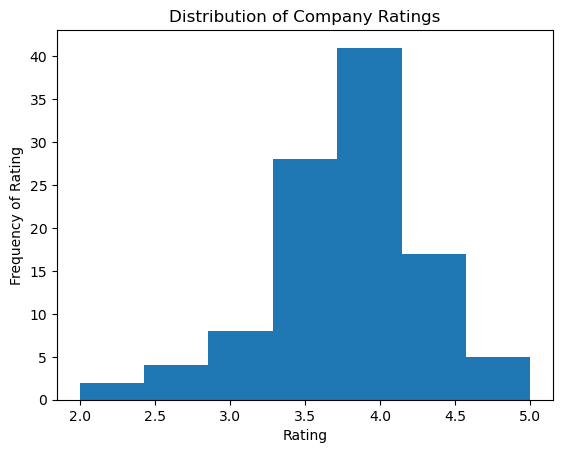

In [155]:
#plotting rating distribution
clean_df['rating'].plot(kind='hist',title='Distribution of Company Ratings', bins=7)
plt.xlabel('Rating')
plt.ylabel('Frequency of Rating')
plt.show()

In [156]:
# How many listings were present in the dataset with companies having a perfect 5 rating
best_df = clean_df.loc[clean_df['rating'] ==5]

print(f"Of the {clean_df['job_description'].count()} company ratings gathered from the Google jobs listings endpoint, only {len(best_df)} listings were posted by companies that had a perfect 5 rating.")

Of the 240 company ratings gathered from the Google jobs listings endpoint, only 2 listings were posted by companies that had a perfect 5 rating.


In [157]:
clean_df.sort_values('rating', ascending= False)

,job_title,company_name,job_description,via,job_id,posted_hours_ago,report_run_datetime,apply_options,rating,#_of_reviews,...,salary_source,my_keywords,job_description_summary,preprocessed_description,sentiment_score,salary_mention,named_entity_recognition,job_desc_len,job_sum_len,senior_match
0,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-08 13:07:51,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...,3663,838,False
1320,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-10 10:16:11,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...,3663,838,False
1,Data Analyst,Ookla,"We’re Ookla, the company behind Speedtest, Dow...",via Jobs By Workable,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,0,2023-03-08 13:07:51,https://apply.workable.com/ookla/j/96DE997419/...,4.7,20.0,...,Indeed,python visualization sql,"We’re Ookla, the company behind Speedtest, Dow...",ookla compani behind speedtest downdetector su...,0.9989,"['range', 'reflected', 'is', 'an', 'estimate',...",(S\n We/PRP\n ’/VBP\n re/JJ\n Ookla/NNP\n ...,4933,1108,False
2,Senior Data Analyst,Vouch,"About Vouch:\n\nInsurance... sounds slow, old-...",via Y Combinator,eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,0,2023-03-08 13:07:51,https://www.ycombinator.com/companies/vouch/jo...,4.6,28.0,...,NaN,python sql tableau,"As an insurance company, data is at the core o...",vouch insur sound slow unexcit exact insur bro...,0.9892,"['Range:', 'The', 'pay', 'range', 'for', 'this...",(S\n About/IN\n (PERSON Vouch/JJ)\n :/:\n ...,5440,1397,True
1321,Senior Data Analyst,Vouch,"About Vouch:\n\nInsurance... sounds slow, old-...",via Y Combinator,eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,0,2023-03-10 10:16:11,https://www.ycombinator.com/companies/vouch/jo...,4.6,28.0,...,NaN,python sql tableau,"As an insurance company, data is at the core o...",vouch insur sound slow unexcit exact insur bro...,0.9892,"['Range:', 'The', 'pay', 'range', 'for', 'this...",(S\n About/IN\n (PERSON Vouch/JJ)\n :/:\n ...,5440,1397,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,Senior Data Analyst,OGC Global,OGC is a boutique research and consulting agen...,via OGC Global,eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,408,2023-03-10 10:16:11,https://ogcglobal.recruitee.com/o/senior-data-...,NaN,NaN,...,Glassdoor,sql tableau,We work with some of the world’s largest organ...,ogc boutiqu research consult agenc special str...,0.9774,salary not mentioned,(S\n (ORGANIZATION OGC/NNP)\n is/VBZ\n a/DT...,2746,1209,True
1435,Data Analyst,Media Spark Online,Description\n\nWe are looking for a passionate...,via Comeet,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,504,2023-03-10 10:16:11,https://www.comeet.com/jobs/mediaspark/98.00F/...,NaN,NaN,...,NaN,sql,Description We are looking for a passionate ce...,descript look passion certifi data analyst suc...,0.9897,salary not mentioned,(S\n Description/NN\n We/PRP\n are/VBP\n l...,4735,372,False
1436,Senior Data Analyst (Remote),Flex,"Flex is an early-stage, remote-first FinTech s...",via Built In NYC,eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0IC...,552,2023-03-10 10:16:11,https://www.builtinnyc.com/job/data/senior-dat...,NaN,NaN,...,Talent.com,sql tableau,The Analytics team at Flex is responsible for ...,flex fintech startup creat best rent pay

In [158]:
best_df

,job_title,company_name,job_description,via,job_id,posted_hours_ago,report_run_datetime,apply_options,rating,#_of_reviews,...,salary_source,my_keywords,job_description_summary,preprocessed_description,sentiment_score,salary_mention,named_entity_recognition,job_desc_len,job_sum_len,senior_match
0,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-08 13:07:51,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...,3663,838,False
1320,Data Analyst - Product and Acquisition focus,Wanderu,Wanderu is the leading ground travel search in...,via Openings At Wanderu,eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBQcm9kdW...,0,2023-03-10 10:16:11,https://wanderu.breezy.hr/p/0592386a7c2d-data-...,5.0,9.0,...,NaN,python sql,Wanderu is a company that values and promotes ...,wanderu lead ground travel search north americ...,0.9949,salary not mentioned,(S\n (GPE Wanderu/NNP)\n is/VBZ\n the/DT\n ...,3663,838,False


In [159]:
clean_df.columns

Index(['job_title', 'company_name', 'job_description', 'via', 'job_id',
       'posted_hours_ago', 'report_run_datetime', 'apply_options', 'rating',
       '#_of_reviews', 'rating_source', 'salary_based_on', 'salary_from',
       'salary_to', 'salary_source', 'my_keywords', 'job_description_summary',
       'preprocessed_description', 'sentiment_score', 'salary_mention',
       'named_entity_recognition', 'job_desc_len', 'job_sum_len',
       'senior_match'],
      dtype='object')